In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
body = State(R=200,
             L=0,
             E=0,
             V=4e-7)

system = System(gamma=1.36, #per day
                mu=1.36e-3,
                tau=0.2,
                beta=0.00027,
                p=0.1,
                alpha=3.6e-2,
                sigma=2,
                delta=0.33,
                pi=100)

,values
gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
p,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000


In [3]:
def update_R(state, system,in_day):
    dR = (gamma/in_day * tau) - (mu/in_day * state.R) - (beta/in_day * state.R * state.V)
    return dR + state.R

def update_L(state, system,in_day):
    dL = (p * beta/in_day * state.R * state.V) - (mu/in_day * state.L) - (alpha/in_day * state.L)
    return dL + state.L

def update_E(state, system,in_day):
    dE = ((1 - p) * beta/in_day * state.R * state.V) + (alpha/in_day * state.L) - (delta/in_day * state.E)
    return dE + state.E

def update_V(state, system,in_day):
    dV = (pi/in_day * state.E) - (sigma/in_day * state.V)
    return dV + state.V

def update_body(state, system,in_day):    
 
    for i in range(in_day):
        nr = update_R(state, system, in_day)
        nl = update_L(state, system, in_day)
        ne = update_E(state, system, in_day)
        nv = update_V(state, system, in_day)
        state = State(R=nr, L=nl, E=ne, V=nv)
    
    return State(R=nr, L=nl, E=ne, V=nv)

In [4]:
def run_simulation(state, system, update_func, days, steps_per_day):
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[0] = state
    
    for t in linrange(0, days):
        frame.row[t + 1] = update_func(frame.row[t], system, steps_per_day)
    
    return frame

,R,L,E,V
0,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
1,200.000000,1.714419e-09,1.349327e-08,4.340480e-07
2,200.000000,6.030482e-09,4.497772e-08,1.407827e-06
3,200.000000,2.023938e-08,1.486261e-07,4.650839e-06
4,199.999999,6.717577e-08,4.910993e-07,1.536746e-05
5,199.999998,2.222550e-07,1.622730e-06,5.077831e-05
6,199.999992,7.346702e-07,5.361969e-06,1.677861e-04
7,199.999975,2.427828e-06,1.771750e-05,5.544139e-04
8,199.999917,8.022501e-06,5.854377e-05,1.831944e-03
9,199.999727,2.650890e-05,1.934455e-04,6.053274e-03


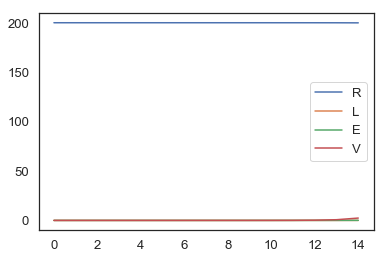

In [5]:
sim=run_simulation(body, system, update_body, 14,24*60)
sim.plot()
sim
